In [53]:
import numpy as np
import requests
import re
import string
from typing import Dict, Tuple, Sequence
import matplotlib.pyplot as plt

# Get raw data from internet

In [9]:
# Get the data
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

In [11]:
text = book.text
len(text)

182973

In [16]:
# character strings to replace with space
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

# e.g., 'â\x80\x9d'.encode('latin1').decode('utf8')

# use regular expression (re) to replace those strings with space
for s in strings2replace:
  text = text.replace(s, ' ')

# remove non-ASCII characters
text = re.sub(r'[^\x00-\x7F]+', ' ', text)

# remove numbers
text = re.sub(r'\d+','',text)

# and make everything lower-case
text = text.lower()

# let's have a look!
text[:2000]

'*** start of the project gutenberg ebook  ***     the time machine  an invention  by h. g. wells   contents   i introduction  ii the machine  iii the time traveller returns  iv time travelling  v in the golden age  vi the sunset of mankind  vii a sudden shock  viii explanation  ix the morlocks  x when night came  xi the palace of green porcelain  xii in the darkness  xiii the trap of the white sphinx  xiv the further vision  xv the time traveller s return  xvi after the story  epilogue      i.  introduction   the time traveller (for so it will be convenient to speak of him) was expounding a recondite matter to us. his pale grey eyes shone and twinkled, and his usually pale face was flushed and animated. the fire burnt brightly, and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses. our chairs, being his patents, embraced and caressed us rather than submitted to be sat upon, and there was that luxurious after-

In [27]:
# Remove the punctuations from the string
pattern = fr"[{re.escape(string.punctuation)}\s]+"

words = re.split(pattern, text)
words = [item.strip() for item in words if item.strip()]

# Remove single character words
words = [item for item in words if len(item)>1]

vocab = sorted(set(words))
print(f"{len(words)} words")
print(f"{len(vocab)} unique words")

30698 words
4589 unique words


In [38]:
# Create tokens dictionaries and encoder/ decoder functions
word2idx = {word : i for i, word in enumerate(vocab)}
idx2word = {i : word for i, word in enumerate(vocab)}

# Encoder Function
def encoder(words: Sequence[str], encode_dict: Dict)-> Sequence[int]:

  # Initialize a vector of numerical indeices
  idxs = np.zeros((len(words),), dtype=int)

  # Loop through the words and identify the token in the vocabulary
  for idx, w in enumerate(words):
    idxs[idx] = encode_dict[w]

  return idxs


# Decoder Function
def decoder(idxs: Sequence[int], decode_dict: Dict)-> Sequence[str]:
  decoded_words = [decode_dict[idx] for idx in idxs]

  return ' '.join(decoded_words)


In [39]:
print(encoder(['the', 'time', 'machine'], word2idx))
print(decoder([4042, 4109, 2416], idx2word))

[4042 4109 2416]
the time machine


In [48]:
num_words = len(words)
num_lex = len(vocab)

brown_noise = np.cumsum(np.random.choice([-1,1],30))

random_tokens = brown_noise + np.random.choice(num_lex, 1)

print(f"Random Tokens: \n\t{random_tokens}")
print(f"Decoded Text: \n\t{decoder(random_tokens, idx2word)}")


Random Tokens: 
	[1593 1594 1593 1594 1593 1592 1593 1592 1591 1592 1591 1590 1589 1590
 1591 1590 1591 1590 1589 1588 1587 1588 1587 1588 1589 1588 1587 1588
 1589 1590]
Decoded Text: 
	forty forward forty forward forty fortunate forty fortunate forthwith fortunate forthwith forth forms forth forthwith forth forthwith forth forms forming former forming former forming forms forming former forming forms forth


In [52]:
num_chars = np.zeros(num_words)

for idx, w in enumerate(words):
  num_chars[idx] = len(w)

# Count the number of words with the characters
char_counts = np.zeros(int(np.max(num_chars)))

for i in range(len(char_counts)):
  char_counts[i] = np.sum(num_chars == i)

char_counts

array([0.000e+00, 0.000e+00, 5.323e+03, 7.406e+03, 5.879e+03, 3.647e+03,
       2.568e+03, 2.222e+03, 1.455e+03, 9.950e+02, 6.580e+02, 2.560e+02,
       1.950e+02, 6.200e+01, 2.600e+01, 4.000e+00])

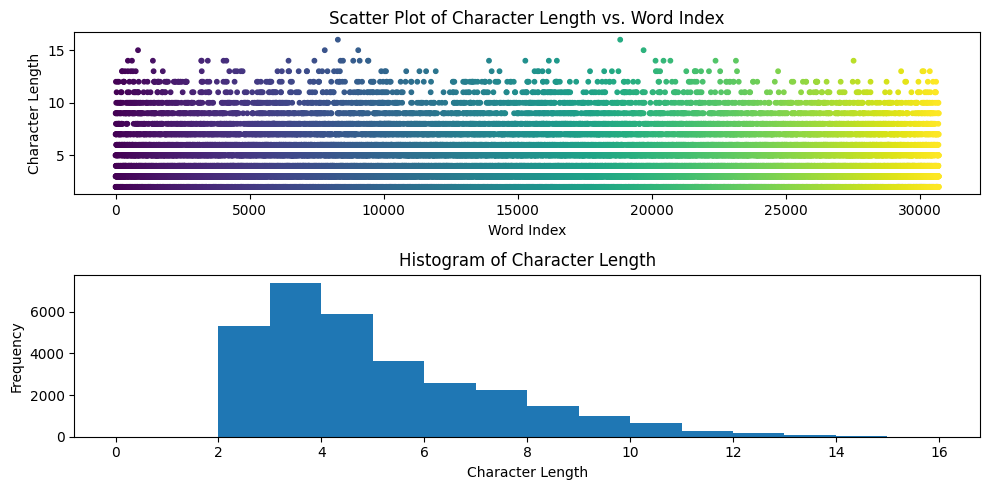

In [57]:
# Plot the distribution of character length of each token in a scatter plot and histogram

fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].scatter(np.arange(num_words), num_chars, s=10, c=np.linspace(.1, .9, len(num_chars)))
axs[0].set_xlabel('Word Index')
axs[0].set_ylabel('Character Length')
axs[0].set_title('Scatter Plot of Character Length vs. Word Index')

axs[1].hist(num_chars, bins=np.arange(np.max(num_chars)+1))
axs[1].set_xlabel('Character Length')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Character Length')

plt.tight_layout()

plt.show();
